<a href="https://colab.research.google.com/github/ABHI20-STAT/Numerical-Methods/blob/main/Geometric_Essence_of_Linearization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The curve $y=f(x)$, its tangent-line model $y=L_a(x)$ at $x=a$, and the approximation error at a nearby point $x$.

'/mnt/data/linearization_static.png'

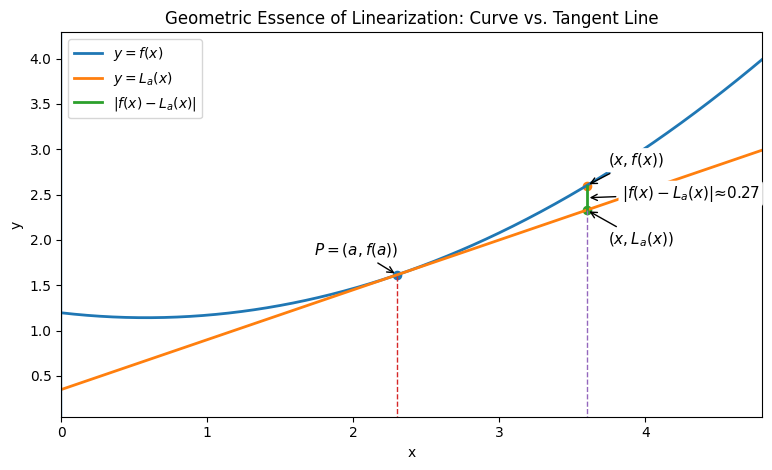

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os # Import the os module

def f(x):
    return 0.35 + 0.55*x + 0.16*(x-2.3)**2

def fp(x):
    return 0.55 + 0.32*(x-2.3)

# Parameters
a = 2.3
x0 = 3.6
xmin, xmax = 0.0, 4.8

xs = np.linspace(xmin, xmax, 600)

fa = f(a)
m = fp(a)
L = lambda t: fa + m*(t-a)

fx0 = f(x0)
Lx0 = L(x0)

# Build plot
plt.figure(figsize=(8, 4.8))
plt.plot(xs, f(xs), linewidth=2, label=r"$y=f(x)$")
plt.plot(xs, L(xs), linewidth=2, label=r"$y=L_a(x)$")

# Axes lines
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Points
plt.scatter([a], [fa], s=35)
plt.scatter([x0], [fx0], s=35)
plt.scatter([x0], [Lx0], s=35)

# Vertical error segment
plt.plot([x0, x0], [Lx0, fx0], linewidth=2, label=r"$|f(x)-L_a(x)|$")

# Dashed drops
plt.plot([a, a], [0, fa], linestyle="--", linewidth=1)
plt.plot([x0, x0], [0, Lx0], linestyle="--", linewidth=1)

# Labels (offset to reduce overlap)
plt.annotate(r"$P=(a,f(a))$", xy=(a, fa), xytext=(-60, 15),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

plt.annotate(r"$(x,f(x))$", xy=(x0, fx0), xytext=(15, 15),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

plt.annotate(r"$(x,L_a(x))$", xy=(x0, Lx0), xytext=(15, -25),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

err = abs(fx0 - Lx0)
plt.annotate(rf"$|f(x)-L_a(x)|≈ {err:.3g}$",
             xy=(x0, (fx0 + Lx0)/2), xytext=(25, 0),
             textcoords="offset points", fontsize=11,
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"),
             arrowprops=dict(arrowstyle="->", linewidth=1))

# Mark a and x on x-axis
plt.annotate(r"$a$", xy=(a, 0), xytext=(0, -18), textcoords="offset points", ha="center", fontsize=11)
plt.annotate(r"$x$", xy=(x0, 0), xytext=(0, -18), textcoords="offset points", ha="center", fontsize=11)

plt.xlim(xmin, xmax)
# y-limits with padding
yvals = np.concatenate([f(xs), L(xs)])
plt.ylim(min(yvals)-0.3, max(yvals)+0.3)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Geometric Essence of Linearization: Curve vs. Tangent Line")
plt.legend(loc="upper left", frameon=True)
plt.tight_layout()

out_path = "/mnt/data/linearization_static.png"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(out_path), exist_ok=True)

plt.savefig(out_path, dpi=200)
out_path

**Explanation:** The blue curve represents the true function values $y=f(x)$, while the orange line represents the *linearization* (tangent-line approximation) of $f$ at the base point $a$,

$$ L_a(x)=f(a)+f'(a)(x-a).$$
    
The marked point $P=(a,f(a))$ is the point of tangency, so the line agrees with the function both in value and slope at $x=a$: $L_a(a)=f(a)$ and $L_a'(a)=f'(a)$. For a nearby input $x$, the diagram highlights two points with the same
horizontal coordinate: $(x,f(x))$ on the curve (the exact value) and $(x,L_a(x))$ on the tangent line (the approximated value). The green vertical segment between these points is the approximation error

$$ |f(x)-L_a(x)|,$$
    
i.e.\ the vertical gap produced by replacing the curve with its tangent line. The dashed vertical lines simply locate the inputs $a$ and $x$ on the $x$-axis. The picture encodes the main principle of linearization: when $x$ is close to $a$,the curve is nearly straight at the scale of interest, so $f(x)\approx L_a(x)$; as $x$ moves away from $a$, curvature causes the curve to deviate from the tangent line and the error grows. Under mild smoothness (e.g.\ $f\in C^2$), Taylor's theorem makes this quantitative by showing that the error is typically second order in the displacement:
$$f(x)-L_a(x)=\frac{f''(\xi)}{2}(x-a)^2 \quad\text{for some }\xi \text{ between }a\text{ and }x,$$
    
which explains why linearization becomes rapidly more accurate as $|x-a|$ decreases.

In [3]:
import numpy as np
import plotly.graph_objects as go

def f(x):
    return 0.35 + 0.55*x + 0.16*(x-2.3)**2

def fp(x):
    # derivative of 0.35 + 0.55x + 0.16(x-2.3)^2
    return 0.55 + 0.32*(x-2.3)

def make_linearization_figure(a=2.3, x=3.6, x_min=0.0, x_max=4.8, n=400):
    xs = np.linspace(x_min, x_max, n)
    ys = f(xs)

    fa = f(a)
    m = fp(a)
    L = lambda t: fa + m*(t-a)

    # for plotting tangent line over a window
    ysL = L(xs)

    fx = f(x)
    Lx = L(x)

    fig = go.Figure()

    # curve and tangent
    fig.add_trace(go.Scatter(x=xs, y=ys, mode="lines", name="y=f(x)"))
    fig.add_trace(go.Scatter(x=xs, y=ysL, mode="lines", name="y=L_a(x)"))

    # points
    fig.add_trace(go.Scatter(x=[a], y=[fa], mode="markers+text",
                             text=["P=(a,f(a))"], textposition="top left",
                             name="Base point P"))
    fig.add_trace(go.Scatter(x=[x], y=[fx], mode="markers+text",
                             text=["(x,f(x))"], textposition="top right",
                             name="Point on curve"))
    fig.add_trace(go.Scatter(x=[x], y=[Lx], mode="markers+text",
                             text=["(x,L_a(x))"], textposition="bottom right",
                             name="Point on tangent"))

    # vertical error segment
    fig.add_trace(go.Scatter(x=[x, x], y=[Lx, fx], mode="lines",
                             name="|f(x)-L_a(x)|"))

    # dashed drops to x-axis
    fig.add_trace(go.Scatter(x=[a, a], y=[0, fa], mode="lines",
                             line=dict(dash="dash"), name="a (drop)"))
    fig.add_trace(go.Scatter(x=[x, x], y=[0, Lx], mode="lines",
                             line=dict(dash="dash"), name="x (drop)"))

    # annotate error value
    err = abs(fx - Lx)
    fig.add_annotation(x=x, y=(fx+Lx)/2, text=f"|f(x)-L_a(x)| ≈ {err:.4g}",
                       showarrow=True, arrowhead=2, ax=40, ay=0)

    # styling
    fig.update_layout(
        title="Linearization as Tangent Line (interactive hover)",
        xaxis_title="x",
        yaxis_title="y",
        hovermode="x unified",
        showlegend=True,
        height=520
    )

    return fig

fig = make_linearization_figure()
fig


## **Algorithmic & Programming Essence of the Plotly Linearization Graph**

This Plotly visualization is not “just a picture.” It is a **computational pipeline** that turns the calculus idea of linearization into something you can **compute, test, and diagnose**.

---

### **What the Graph Computes (Algorithmically)**

**Inputs**
- A differentiable function $f$
- A base point $a$ (where you linearize)
- A nearby point $x$ (where you test the approximation)

#### **Step 1: Sample the Domain (for plotting)**
- Create a grid of points:

$$x_1,\dots,x_n \in [x_{\min},x_{\max}].$$

- In code: `xs = linspace(x_min, x_max, n)`.

#### **Step 2: Compute the True Curve**
Evaluate the function on the grid:

$$y_i = f(x_i).$$

This produces the blue curve $y=f(x)$.

#### **Step 3: Construct the Linearization (Tangent Model)**
- Compute the two local pieces of information:

$$f(a), \qquad f'(a).$$

- Define the tangent-line (linearization) model:
\[
L_a(t) = f(a) + f'(a)(t-a).
\]
- Evaluate it on the same grid:

$$\ell_i = L_a(x_i).$$

- This produces the orange line $y=L_a(x)$.

#### **Step 4: Compare “Exact” vs “Approximate” at a Specific $x$**
- Compute:
$$f(x), \qquad L_a(x),$$

- and The Error:

$$\text{error}(x)=|f(x)-L_a(x)|.$$

>  **The Plot Marks:**
> - $(x,f(x))$ on the curve
> - $(x,L_a(x))$ on the tangent line
> - The vertical segment between them (the error)

---

> **Note: This Plot Embodies a Standard Numerical Pattern:**
>
> 1. **Build a Local Model** using information at one point $(f(a),f'(a))$.
> 2. **Use the Model** to predict values nearby: $f(x)\approx L_a(x)$.
> 3. **Measure The Error** $|f(x)-L_a(x)|$.
> 4. **Experiment by Changing $a$ and $x$** to observe when the approximation succeeds or fails.

That is exactly how many numerical methods work: **local approximation + update + diagnostics**.

---

### **Conceptual Value You Gain by visual + Computed Error**

#### 1) **“Zoom-in Linearity” Becomes Measurable**
Instead of only saying “the curve looks like a line near $a$,” you can compute:

$$|f(x)-L_a(x)| \quad \text{and} \quad \frac{|f(x)-L_a(x)|}{|x-a|}.$$

> You literally see how the approximation improves as $x\to a$.

#### 2) **Curvature Controls When Linearization Fails**
When curvature is large, the tangent line peels away quickly. Taylor’s theorem explains this:

$$ f(x)-L_a(x)=\frac{f''(\xi)}{2}(x-a)^2 \quad \text{for some }\xi \text{ between } a \text{ and } x. $$

> So **error typically grows like \((x-a)^2\)** (second order) when \(f\in C^2\).

#### 3) **Linearization is a “Local Surrogate Model”**
The tangent line is the first example of a general numerical modeling idea:
- Replace a nonlinear object by a simple local surrogate,
- Solve the simpler problem,
- Optionally iterate.

> This idea underlies major methods in scientific computing.

---

## **Bridge to Numerical Analysis: Newton’s Method (Root Finding)**

- To solve $f(x)=0$, linearize at $x_k$:

$$f(x)\approx L_{x_k}(x)=f(x_k)+f'(x_k)(x-x_k).$$

- Solve the easier equation $L_{x_k}(x)=0:$

$$0=f(x_k)+f'(x_k)(x-x_k) \quad\Rightarrow\quad x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}.$$

- This is **Newton’s method**.

**Geometric meaning:** $x_{k+1}$ is the **x-intercept of the tangent line** at $x_k$.

---

## **Bridge to Numerical Optimization (One Variable)**

To minimize $\phi(x)$, solve the stationarity condition $\phi'(x)=0$.
Linearize $\phi'$ at $x_k$:

$$0\approx \phi'(x_k)+\phi''(x_k)(x-x_k).$$

Solve for the update:

$$x_{k+1}=x_k-\frac{\phi'(x_k)}{\phi''(x_k)}.$$

This is the **Newton step for optimization**.

Equivalent viewpoint: minimize the local quadratic Taylor model

$$\phi(x)\approx \phi(x_k)+\phi'(x_k)(x-x_k)+\frac12\phi''(x_k)(x-x_k)^2.$$

---

## **Bridge to Statistics: Error Propagation / Delta Method**

If $X$ is noisy and $Y=g(X)$, linearize $g$ at $\mu=\mathbb{E}[X]$:

$$g(X)\approx g(\mu)+g'(\mu)(X-\mu).$$

Taking variance gives the **Delta method** approximation:

$$\mathrm{Var}(g(X))\approx (g'(\mu))^2\,\mathrm{Var}(X).$$

So the same tangent-line idea becomes a tool for **uncertainty quantification**.

---

### Optional improvements you can add to the Plotly graph
If you want to push the concept further, you can extend the visualization to include:
- An error function plot: $e(t)=f(t)-L_a(t)$
- Relative error: $|f(t)-L_a(t)|/|t-a|$
- Newton-step marker (tangent x-intercept)
- curvature indicator using $f''$ and the bound $\frac{M}{2}(x-a)^2$

